In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines
import attila_utils

In [2]:
treatments = {
    'A': 'Amiloride',
    'B': 'HCQ',
    'C': 'HCQ nano',
    'D': 'Saline',
    'E': 'R-HCQ',
    'F': 'S-HCQ',
    'G': 'TUDCA',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

In [3]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_invivo = pd.read_excel(fpath, sheet_name='NFL in vivo clean')
#nfl_invivo = nfl_invivo.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L')
#nfl_invivo['Week'] = nfl_invivo.variable.str.replace('NF-L week ', '').astype(int)
nfl_invivo['IRN'] = nfl_invivo.IRN.astype('str')
nfl_invivo['Sex'] = pd.Categorical(nfl_invivo['Sex'], categories=['m', 'f'], ordered=True)
nfl_invivo['NF-L week 0-4 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 4'] / r.loc['NF-L week 0'], axis=1)
nfl_invivo['NF-L week 0-8 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 8'] / r.loc['NF-L week 0'], axis=1)
nfl_invivo['NF-L week 0-12 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 12'] / r.loc['NF-L week 0'], axis=1)
data = nfl_invivo[['Group', 'IRN', 'Sex', 'Genotype', 'NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']]
data = pd.concat([data, data.Group.apply(lambda g: treatments[g]).to_frame('Treatment')], axis=1)
data['IRN'] = data.IRN.astype('str')
data['Treatment'] = pd.Categorical(data.Treatment, categories=['Saline', 'Amiloride', 'HCQ', 'HCQ nano', 'R-HCQ', 'S-HCQ', 'TUDCA', 'Saline WT', 'TUDCA WT', 'DMSO WT'], ordered=True)
data.head()

,Group,IRN,Sex,Genotype,NF-L week 0-4 change,NF-L week 0-8 change,NF-L week 0-12 change,Treatment
0,A,15117,f,tg/wt,1.494792,1.314236,1.192708,Amiloride
1,A,15119,f,tg/wt,1.492837,1.121777,0.922636,Amiloride
2,A,14627 A,f,tg/wt,1.547789,0.965763,1.088445,Amiloride
3,A,15161,f,tg/wt,1.236934,1.198606,1.790941,Amiloride
4,A,15938,m,tg/wt,1.920962,1.295533,1.505155,Amiloride


In [4]:
value_vars = ['NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']
id_vars = ['Group', 'IRN', 'Sex', 'Genotype', 'Treatment']
datalong = data.melt(value_vars=value_vars, id_vars=id_vars, value_name='NF-L change', var_name='Duration')
datalong['Duration'] = datalong.Duration.str.replace('NF-L ', '').str.replace(' change', '')
datalong

,Group,IRN,Sex,Genotype,Treatment,Duration,NF-L change
0,A,15117,f,tg/wt,Amiloride,week 0-4,1.494792
1,A,15119,f,tg/wt,Amiloride,week 0-4,1.492837
2,A,14627 A,f,tg/wt,Amiloride,week 0-4,1.547789
3,A,15161,f,tg/wt,Amiloride,week 0-4,1.236934
4,A,15938,m,tg/wt,Amiloride,week 0-4,1.920962
...,...,...,...,...,...,...,...
172,J,15195 A,f,wt/wt,DMSO WT,week 0-12,1.200000
173,J,15251,f,wt/wt,DMSO WT,week 0-12,1.296296
174,J,16180,m,wt/wt,DMSO WT,week 0-12,0.685714
175,J,16192,m,wt/wt,DMSO WT,week 0-12,1.128205


/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-stripplot-linear-log-scale.png',
 'named-figure/nfl-stripplot-linear-log-scale.pdf']

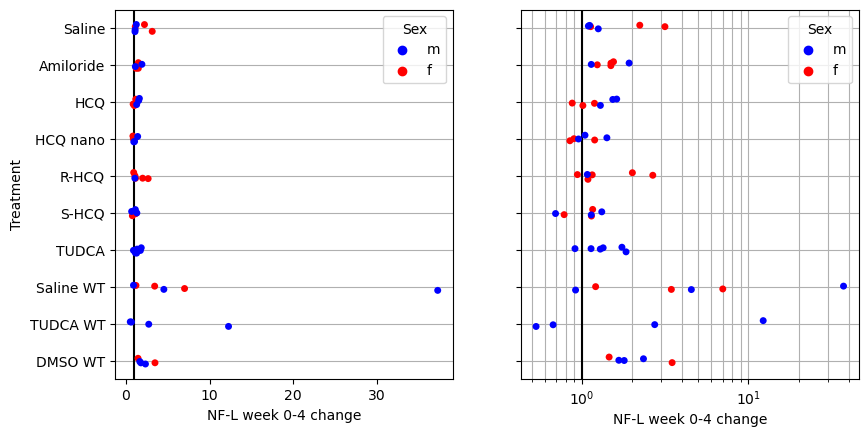

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9.6, 4.8))
for axi in ax:
    axi.axvline(1, color='k')
    sns.stripplot(data=data, x='NF-L week 0-4 change', y='Treatment', hue='Sex', palette={'m': 'blue', 'f': 'red'}, ax=axi)
    axi.grid(axis='y')

ax[1].grid(axis='x', which='both')
ax[1].set_xscale('log')
attila_utils.savefig(fig, 'nfl-stripplot-linear-log-scale')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-stripplot-week-4-8-12.png',
 'named-figure/nfl-stripplot-week-4-8-12.pdf']

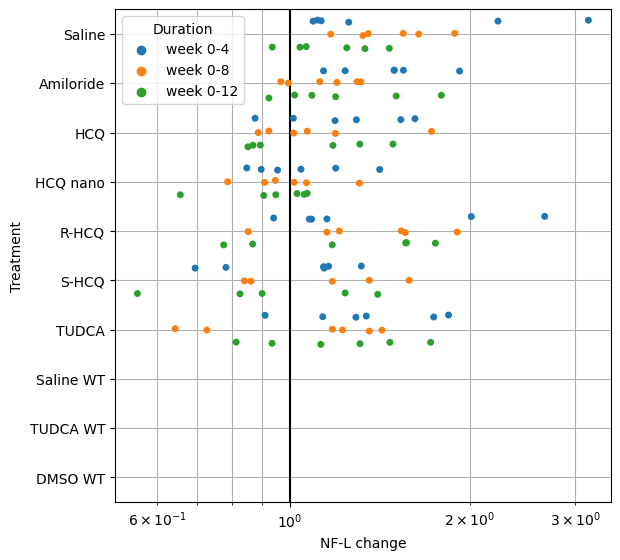

In [6]:
fig, ax = plt.subplots(figsize=(6.4, 6.4))
ax.axvline(1, color='k')
sns.stripplot(data=datalong.loc[~ datalong.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])], x='NF-L change', y='Treatment', hue='Duration', dodge=True, ax=ax)
ax.grid(axis='x', which='both')
ax.grid(axis='y')
ax.set_xscale('log')
attila_utils.savefig(fig, 'nfl-stripplot-week-4-8-12')

In [7]:
data_wt = data.loc[data.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])]
data_tg = data.loc[~ data.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])].copy()
data_tg['Treatment'] = pd.Categorical(data_tg.Treatment, categories=['Saline', 'Amiloride', 'HCQ', 'HCQ nano', 'R-HCQ', 'S-HCQ', 'TUDCA'], ordered=True)
data_tg = pd.concat([data_tg.loc[:, :'Genotype'], data_tg[['Treatment']],
                     data_tg.loc[:, 'NF-L week 0-4 change':'NF-L week 0-12 change']], axis=1)
data_tg_4_8 = pd.concat([data_tg.loc[:, :'NF-L week 0-4 change'].rename({'NF-L week 0-4 change': 'NF-L change'}, axis=1),
                         data_tg.loc[:, :'NF-L week 0-8 change'].drop('NF-L week 0-4 change', axis=1).rename({'NF-L week 0-8 change': 'NF-L change'}, axis=1)], axis=0)
data_tg_4_8['IRN'] = data_tg_4_8.IRN.astype('str')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-stripplot-week-4-8-12-3panels.png',
 'named-figure/nfl-stripplot-week-4-8-12-3panels.pdf']

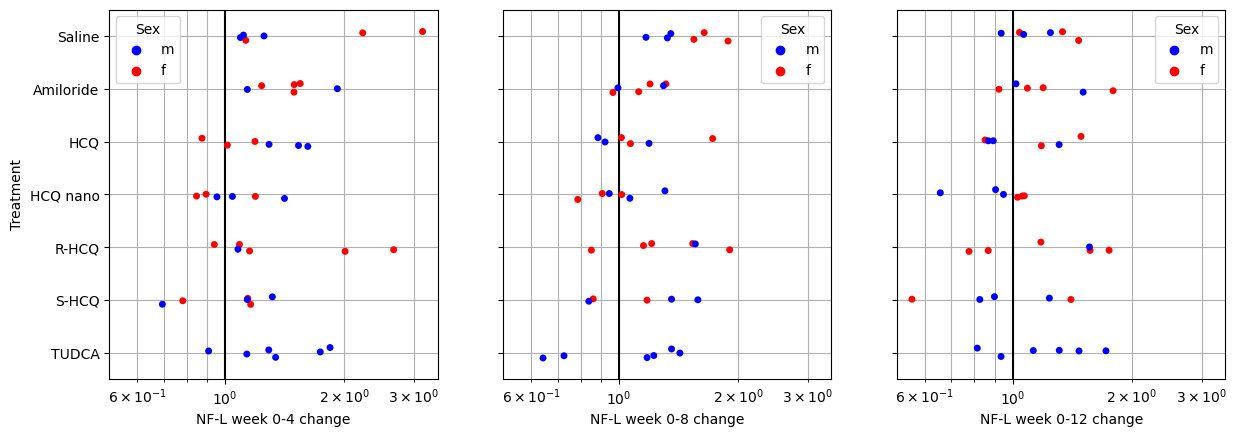

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14.4, 4.8))
for axi, x in zip(ax, ['NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']):
    axi.axvline(1, color='k')
    sns.stripplot(data=data_tg, x=x, y='Treatment', hue='Sex', palette={'m': 'blue', 'f': 'red'}, ax=axi)
    axi.set_xscale('log')
    axi.grid(axis='x', which='both')
    axi.grid(axis='y')

attila_utils.savefig(fig, 'nfl-stripplot-week-4-8-12-3panels')

In [9]:
def results2df(results):
    df = pd.concat([results.params.to_frame('mean'),
                    results.bse.to_frame('bse'),
                    results.pvalues.to_frame('pval')], axis=1)
    df['treatment'] = df.index
    return(df)

def result_plotter(df, suptitle='', legend_loc='best'):
    full_effect_mean, full_effect_se = df.loc['Intercept', ['mean', 'bse']]
    df = df.drop('Intercept', axis=0)
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9.6, 4.8))
    rectL, rectR = [Rectangle(xy=(- full_effect_mean, -0.5), width=full_effect_se, height=df.shape[0] + 1, alpha=0.5, color='lightgreen', angle=a, rotation_point=(- full_effect_mean, df.shape[0]/2)) for a in [180, 0]]
    ax[0].add_patch(rectL)
    ax[0].add_patch(rectR)
    ax[0].axvline(0, color='k', linewidth=1)
    ax[0].grid(linestyle='dotted')
    ax[0].axvline(- full_effect_mean, color='green', linewidth=1, linestyle='solid')
    ax[0].errorbar(y=np.arange(df.shape[0]), x=df['mean'], xerr=df['bse'], linewidth=0, elinewidth=1, marker='d', capsize=0)
    ax[0].set_title(r'effect size, $\hat{\beta}_j \pm \mathrm{SE}_j$')
    black_line, green_line = [mlines.Line2D([], [], color=color, marker=None, linewidth=1, label=label) for color, label in zip(['black', 'green'], ['no effect', 'full effect'])]
    ax[0].legend(handles=[black_line, green_line], loc=legend_loc)
    ax[1].axvline(1, color='k', linewidth=1)
    sns.stripplot(x='pval', y='treatment', ax=ax[1], data=df)
    ax[1].grid(linestyle='dotted')
    ax[1].set_xscale('log')
    ax[1].set_xlabel('')
    ax[1].set_title(r'$p$-value for no effect $H_{0j}: \; \beta_j = 0$')
    fig.suptitle(suptitle)
    return((fig, ax))

In [10]:
formula = 'np.log(Q("NF-L week 0-4 change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg).fit()
result_tg_4 = results2df(result)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     np.log(Q("NF-L week 0-4 change"))   R-squared:                       0.220
Model:                                           OLS   Adj. R-squared:                  0.087
Method:                                Least Squares   F-statistic:                     1.647
Date:                               Mon, 08 Jan 2024   Prob (F-statistic):              0.163
Time:                                       15:36:24   Log-Likelihood:                -5.4543
No. Observations:                                 42   AIC:                             24.91
Df Residuals:                                     35   BIC:                             37.07
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4153      0.123      3.370      0.002       0.165       0.665
Treatment[T.Amiloride]    -0.0428      0.174     -0.246      0.807      -0.397       0.311
Treatment[T.HCQ]          -0.2124      0.174     -1.219      0.231      -0.566       0.141
Treatment[T.HCQ nano]     -0.3750      0.174     -2.152      0.038      -0.729      -0.021
Treatment[T.R-HCQ]        -0.0957      0.174     -0.549      0.586      -0.449       0.258
Treatment[T.S-HCQ]        -0.4028      0.174     -2.311      0.027      -0.757      -0.049
Treatment[T.TUDCA]        -0.1248      0.174     -0.716      0.479      -0.479       0.229
==============================================================================
Omnibus:                        3.310   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.881
Skew:                           0.638   Prob(JB):                        0.237
Kurtosis:                       2.861   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-drugeffect-tg-week-4.png',
 'named-figure/nfl-drugeffect-tg-week-4.pdf']

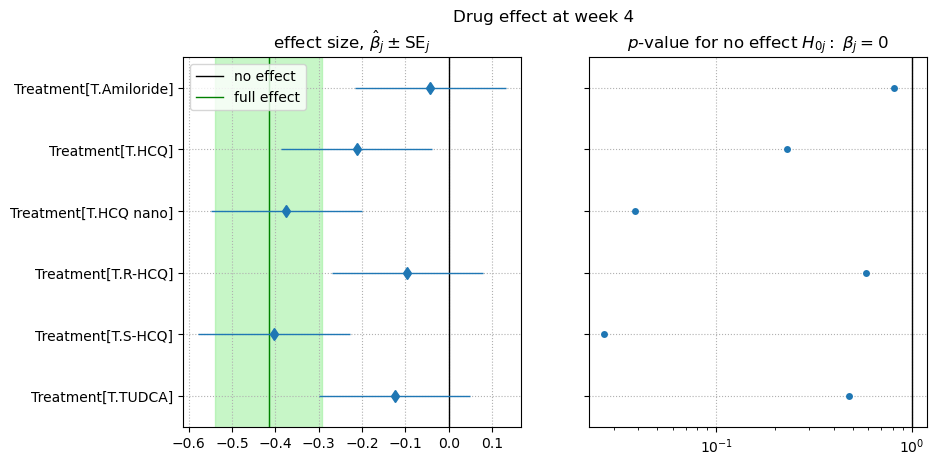

In [11]:
fig, ax = result_plotter(result_tg_4, 'Drug effect at week 4', legend_loc='upper left')
attila_utils.savefig(fig, 'nfl-drugeffect-tg-week-4')

In [12]:
formula = 'np.log(Q("NF-L week 0-8 change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg).fit()
result_tg_8 = results2df(result)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     np.log(Q("NF-L week 0-8 change"))   R-squared:                       0.255
Model:                                           OLS   Adj. R-squared:                  0.124
Method:                                Least Squares   F-statistic:                     1.942
Date:                               Mon, 08 Jan 2024   Prob (F-statistic):              0.102
Time:                                       15:36:25   Log-Likelihood:                 4.1976
No. Observations:                                 41   AIC:                             5.605
Df Residuals:                                     34   BIC:                             17.60
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3843      0.098      3.925      0.000       0.185       0.583
Treatment[T.Amiloride]    -0.2530      0.138     -1.827      0.076      -0.534       0.028
Treatment[T.HCQ]          -0.2845      0.138     -2.055      0.048      -0.566      -0.003
Treatment[T.HCQ nano]     -0.3918      0.138     -2.829      0.008      -0.673      -0.110
Treatment[T.R-HCQ]        -0.1027      0.138     -0.742      0.463      -0.384       0.179
Treatment[T.S-HCQ]        -0.2637      0.145     -1.815      0.078      -0.559       0.031
Treatment[T.TUDCA]        -0.3400      0.138     -2.455      0.019      -0.621      -0.059
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.600
Skew:                          -0.149   Prob(JB):                        0.741
Kurtosis:                       2.488   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-drugeffect-tg-week-8.png',
 'named-figure/nfl-drugeffect-tg-week-8.pdf']

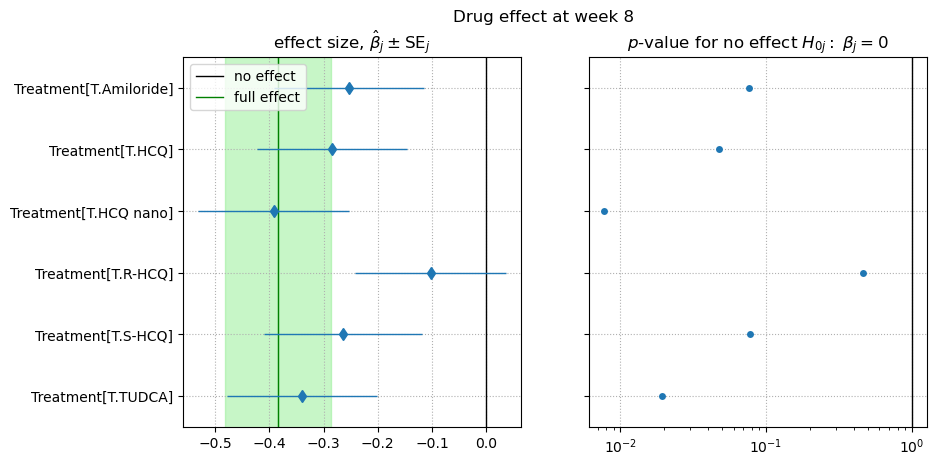

In [13]:
fig, ax = result_plotter(result_tg_8, 'Drug effect at week 8', legend_loc='upper left')
attila_utils.savefig(fig, 'nfl-drugeffect-tg-week-8')

In [14]:
formula = 'np.log(Q("NF-L week 0-12 change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg).fit()
result_tg_12 = results2df(result)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     np.log(Q("NF-L week 0-12 change"))   R-squared:                       0.169
Model:                                            OLS   Adj. R-squared:                  0.023
Method:                                 Least Squares   F-statistic:                     1.154
Date:                                Mon, 08 Jan 2024   Prob (F-statistic):              0.353
Time:                                        15:36:26   Log-Likelihood:               -0.15045
No. Observations:                                  41   AIC:                             14.30
Df Residuals:                                      34   BIC:                             26.30
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1541      0.109      1.415      0.166      -0.067       0.375
Treatment[T.Amiloride]     0.0444      0.154      0.288      0.775      -0.269       0.357
Treatment[T.HCQ]          -0.0850      0.154     -0.552      0.584      -0.398       0.228
Treatment[T.HCQ nano]     -0.2252      0.154     -1.463      0.153      -0.538       0.088
Treatment[T.R-HCQ]         0.0491      0.154      0.319      0.752      -0.264       0.362
Treatment[T.S-HCQ]        -0.2209      0.161     -1.368      0.180      -0.549       0.107
Treatment[T.TUDCA]         0.0193      0.154      0.125      0.901      -0.294       0.332
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.527
Skew:                          -0.185   Prob(JB):                        0.466
Kurtosis:                       2.130   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-drugeffect-tg-week-12.png',
 'named-figure/nfl-drugeffect-tg-week-12.pdf']

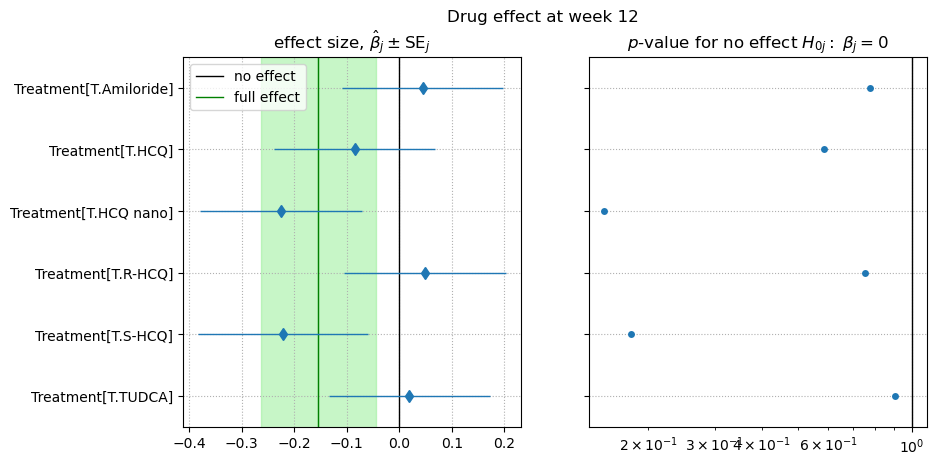

In [15]:
fig, ax = result_plotter(result_tg_12, 'Drug effect at week 12', legend_loc='upper left')
attila_utils.savefig(fig, 'nfl-drugeffect-tg-week-12')

In [16]:
formula = 'np.log(Q("NF-L change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg_4_8).fit()
result_tg_4_8 = results2df(result)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log(Q("NF-L change"))   R-squared:                       0.187
Model:                                  OLS   Adj. R-squared:                  0.123
Method:                       Least Squares   F-statistic:                     2.920
Date:                      Mon, 08 Jan 2024   Prob (F-statistic):             0.0129
Time:                              15:36:27   Log-Likelihood:                -5.7250
No. Observations:                        83   AIC:                             25.45
Df Residuals:                            76   BIC:                             42.38
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3998      0.078      5.112      0.000       0.244       0.556
Treatment[T.Amiloride]    -0.1479      0.111     -1.337      0.185      -0.368       0.072
Treatment[T.HCQ]          -0.2485      0.111     -2.246      0.028      -0.469      -0.028
Treatment[T.HCQ nano]     -0.3834      0.111     -3.466      0.001      -0.604      -0.163
Treatment[T.R-HCQ]        -0.0992      0.111     -0.897      0.373      -0.320       0.121
Treatment[T.S-HCQ]        -0.3381      0.113     -2.990      0.004      -0.563      -0.113
Treatment[T.TUDCA]        -0.2324      0.111     -2.101      0.039      -0.453      -0.012
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.800
Skew:                           0.359   Prob(JB):                        0.407
Kurtosis:                       3.066   Cond. No.                         7.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/nfl-drugeffect-tg-week-4-8.png',
 'named-figure/nfl-drugeffect-tg-week-4-8.pdf']

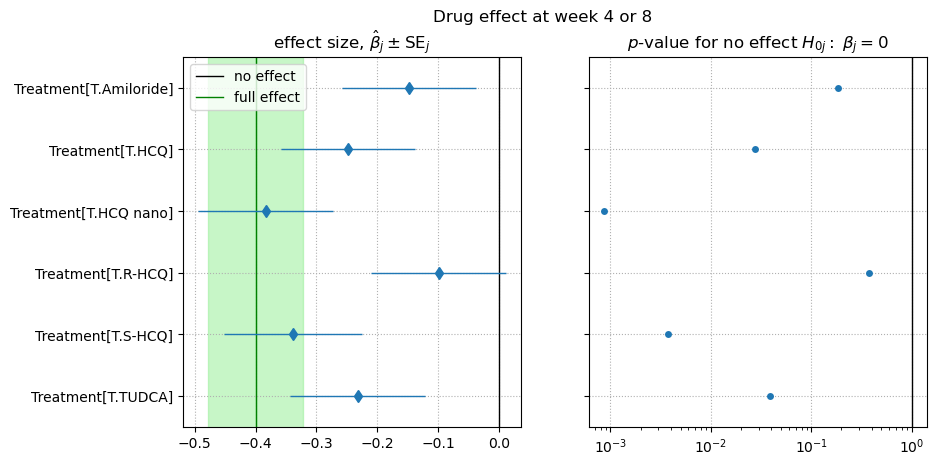

In [17]:
fig, ax = result_plotter(result_tg_4_8, 'Drug effect at week 4 or 8', legend_loc='upper left')
attila_utils.savefig(fig, 'nfl-drugeffect-tg-week-4-8')

In [18]:
%connect_info

{
  "shell_port": 60972,
  "iopub_port": 60973,
  "stdin_port": 60974,
  "control_port": 60976,
  "hb_port": 60975,
  "ip": "127.0.0.1",
  "key": "11db0962-cc8a7c6513bf0cba1a3b3781",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-5d139884-573c-45fe-8113-84eee1d3dad7.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
